In [3]:
import pandas as pd
df = pd.read_excel("myexcel.xlsx") 
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [96]:
#preprocessing corrected the data in height column, replacing it with random number
import numpy as np
df['Height'] = np.random.randint(150, 181, size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0,PG,25,153,180,Texas,7730337,Middle Aged (25-29)
1,Jae Crowder,Boston Celtics,99,SF,25,179,235,Marquette,6796117,Middle Aged (25-29)
2,John Holland,Boston Celtics,30,SG,27,150,205,Boston University,4833969,Middle Aged (25-29)
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640,Young (19-24)
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,Kentucky,5000000,Middle Aged (25-29)
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,159,203,Butler,2433333,Middle Aged (25-29)
454,Raul Neto,Utah Jazz,25,PG,24,162,179,Kentucky,900000,Young (19-24)
455,Tibor Pleiss,Utah Jazz,21,C,26,166,256,Kentucky,2900000,Middle Aged (25-29)
456,Jeff Withey,Utah Jazz,24,C,26,170,231,Kansas,947276,Middle Aged (25-29)


In [5]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [98]:
#1 Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
#we found out that College and salary column in incomplete hence for correct integrity we use mode for completing the College column
freq = df['College'].mode()[0]
df['College'] = df['College'].fillna(freq)

In [7]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,169,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,Kentucky,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,177,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,173,179,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,173,256,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,177,231,Kansas,947276.0


In [8]:
#and here we use mean to fill salary column and making it in integer format 
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Salary'] = df['Salary'].astype(int)

In [9]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,169,205,Boston University,4833969
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,Kentucky,5000000
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,177,203,Butler,2433333
454,Raul Neto,Utah Jazz,25,PG,24,173,179,Kentucky,900000
455,Tibor Pleiss,Utah Jazz,21,C,26,173,256,Kentucky,2900000
456,Jeff Withey,Utah Jazz,24,C,26,177,231,Kansas,947276


In [84]:
uniqcount = df['Team'].value_counts()
perc = (uniqcount / len(df)) * 100
summary = pd.DataFrame({
    'Number of players': uniqcount,
    'Percentage split': perc
})
summary

,Number of players,Percentage split
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


In [11]:
total_positions = df['Position'].nunique()
total_positions

5

In [82]:
#2 Segregate employees based on their positions within the company
nposition = df['Position'].value_counts()
pperc = (nposition / len(df)) * 100
possummary = pd.DataFrame({
    'Count': nposition,
    'Percentage': pperc
})
possummary

,Count,Percentage
Position,,
SG,102,22.270742
PF,100,21.834061
PG,92,20.087336
SF,85,18.558952
C,79,17.248908


In [88]:
#3  Identify the predominant age group among employees.
ua = sorted(df['Age'].unique())
print('Unique ages:', ua)
print('we found out that 19 is the youngest and 40 is the oldest, so we group accordingly as young, Middle and senior Players')
def group_age(age):
    if age <= 24:
        return 'Young (19-24)'
    elif 25 <= age <= 29:
        return 'Middle Aged (25-29)'
    else:
        return 'Senior Players (30+)'
df['Age Group'] = df['Age'].apply(group_age)
age_group_counts = df['Age Group'].value_counts()
predominant_age_group = age_group_counts.idxmax() #max() returns highest count while idxmax() return the label/index of the highes count
print('predominant age group is:',predominant_age_group)

Unique ages: [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
we found out that 19 is the youngest and 40 is the oldest, so we group accordingly as young, Middle and senior Players
predominant age group is: Middle Aged (25-29)


In [90]:
#4 Discover which team and position have the highest salary expenditure.
totalteam = df['Team'].nunique()
totalteam
totexpenditure = df.groupby(['Team', 'Position'])['Salary'].sum()
totexpenditure
highest_salary_expenditure = totexpenditure.idxmax()
highest_expenditure_value = totexpenditure.max()
print('The team and position with the highest salary expenditure are',highest_salary_expenditure)
print('The highest salary expenditure is:',highest_expenditure_value)

The team and position with the highest salary expenditure are ('Los Angeles Lakers', 'SF')
The highest salary expenditure is: 31866445


In [92]:
#5 Investigate if there's any correlation between age and salary, and represent it visually.
relation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", relation)

Correlation between Age and Salary: 0.21116954871839147


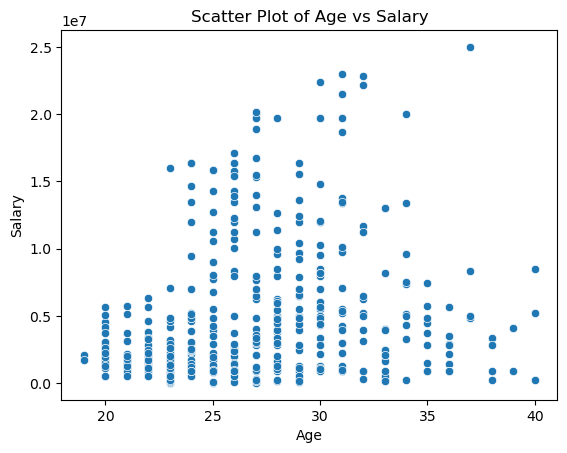

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

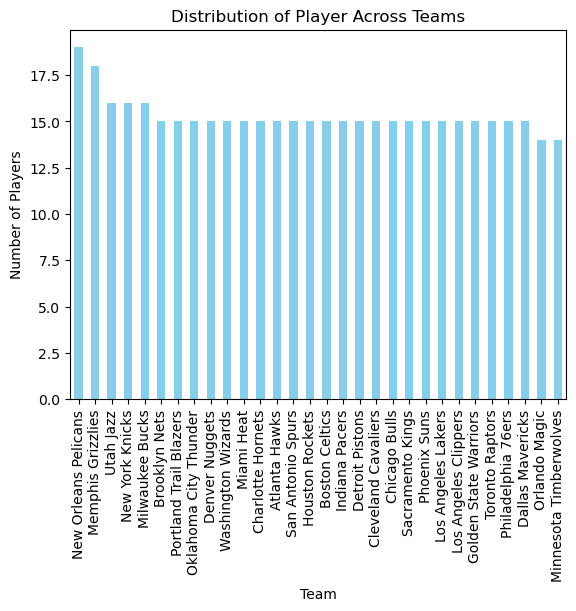

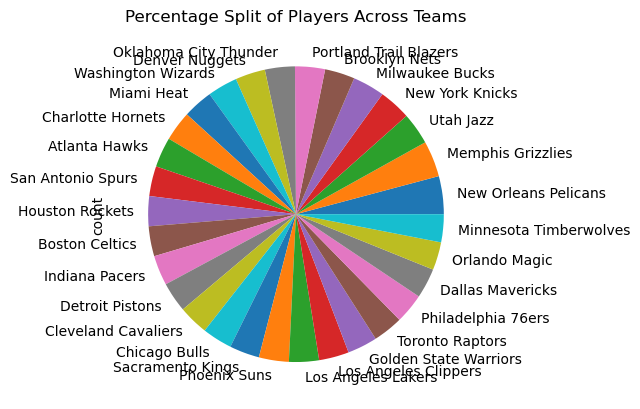

Key insights are..
Teams are fairly balanced in terms of the number of Players.
 Some teams, like the New Orleans Pelicans and Memphis Grizzlies, have slightly more employees than others.


In [94]:
uniqcount.plot(kind='bar', color='skyblue')
plt.title('Distribution of Player Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()
perc.plot(kind='pie')
plt.title('Percentage Split of Players Across Teams')
plt.show()
print('Key insights are..')
print('Teams are fairly balanced in terms of the number of Players.\n Some teams, like the New Orleans Pelicans and Memphis Grizzlies, have slightly more employees than others.')

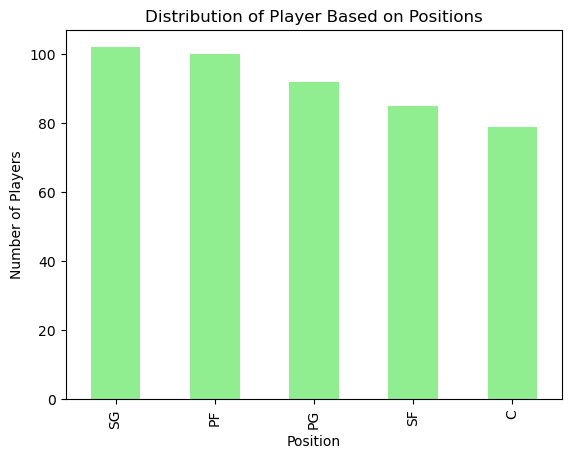

Key insights are..
Roles like (PG) and(SG) are the most common.
 Specialized roles like(C) or (PF) are fewer, showing that these roles might be more specific and less frequently required.


In [60]:
nposition .plot(kind='bar', color='lightgreen')
plt.title('Distribution of Player Based on Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()
print('Key insights are..')
print('Roles like (PG) and(SG) are the most common.\n Specialized roles like(C) or (PF) are fewer, showing that these roles might be more specific and less frequently required.')

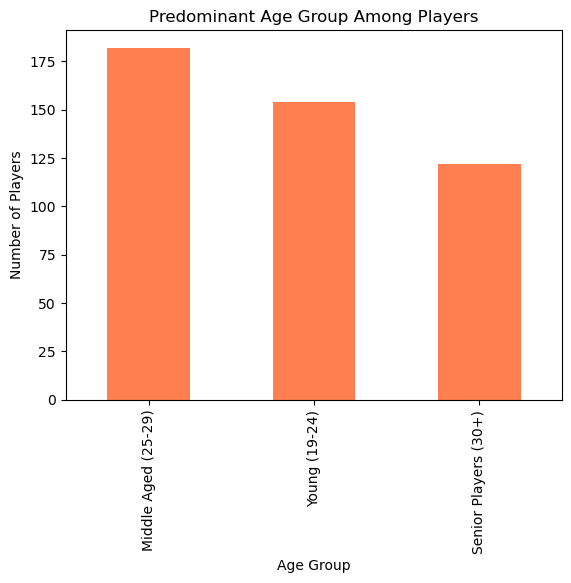

Key Insights are..
The 25-29 age group is the largest, meaning most Players are in their mid-career stage.
The 19-24 age group comes next, showing a good number of younger Players entering the organization.


In [66]:
age_group_counts.plot(kind='bar', color='coral')
plt.title('Predominant Age Group Among Players')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.show()
print('Key Insights are..')
print('The 25-29 age group is the largest, meaning most Players are in their mid-career stage.\nThe 19-24 age group comes next, showing a good number of younger Players entering the organization.')

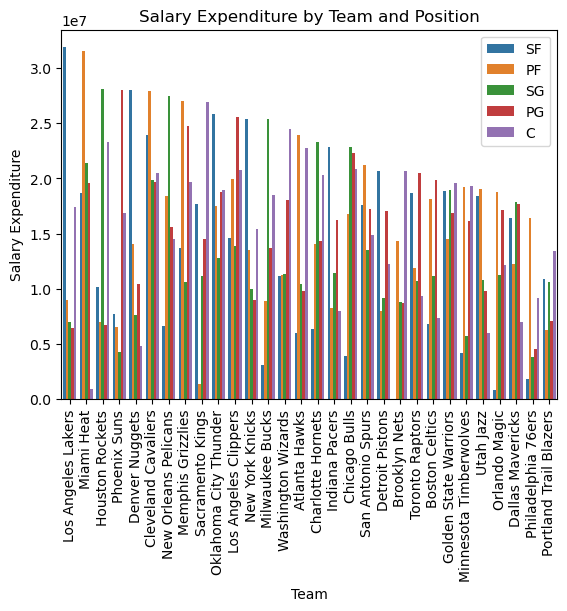

Key insights are..
The team and position with the highest salary expenditure belong to roles like(PG) or(SG). 
These are likely high-value roles for the team.Teams strategically spend more on positions that have the most impact on their performance.


In [68]:
totexpenditure_sorted = totexpenditure.sort_values(ascending=False)
sns.barplot(x=totexpenditure_sorted.index.get_level_values('Team'),y=totexpenditure_sorted.values,hue=totexpenditure_sorted.index.get_level_values('Position'))
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.xticks(rotation=90)
plt.legend()
plt.show()
print('Key insights are..')
print('The team and position with the highest salary expenditure belong to roles like(PG) or(SG). \nThese are likely high-value roles for the team.Teams strategically spend more on positions that have the most impact on their performance.')

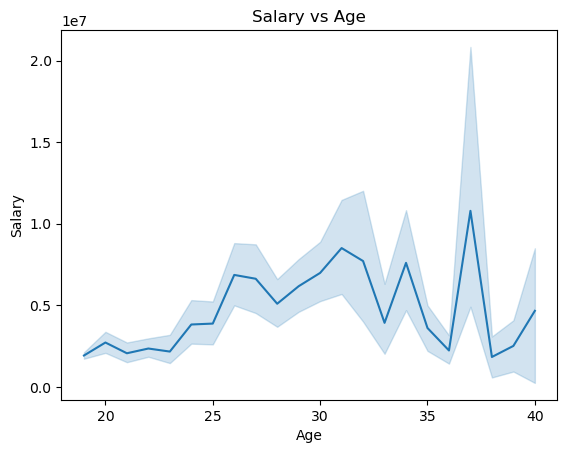

key insights are..
There is a slight positive correlation between Age and Salary (~0.21). Salaries tend to increase with age, but it’s not a strong trend.
Some employees in their mid to late 20s earn the highest salaries, while younger or older employees earning more could indicatespecial talents.


In [76]:
sns.lineplot(data=df, x='Age', y='Salary')
plt.title('Salary vs Age',)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
print('key insights are..')
print('There is a slight positive correlation between Age and Salary (~0.21). Salaries tend to increase with age, but it’s not a strong trend.\nSome employees in their mid to late 20s earn the highest salaries, while younger or older employees earning more could indicatespecial talents.')